In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import random

In [4]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 3*x + 10 + torch.rand(x.size())

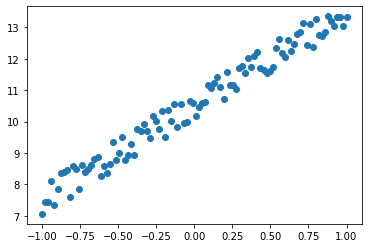

In [6]:
plt.scatter(x.data, y.data)

In [7]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
model = LinearRegression()

In [8]:
cost = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [9]:
for epoch in range(100):
    y_pred = model(x)
    loss = cost(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if((epoch + 1) % 10 == 0):
        print("epoch{}, loss{}".format(epoch+1, loss.data))

epoch10, loss16.461942672729492
epoch20, loss6.339046001434326
epoch30, loss4.107235908508301
epoch40, loss0.21990641951560974
epoch50, loss0.720639705657959
epoch60, loss0.10278646647930145
epoch70, loss0.15826094150543213
epoch80, loss0.10116193443536758
epoch90, loss0.09706351161003113
epoch100, loss0.09514839202165604


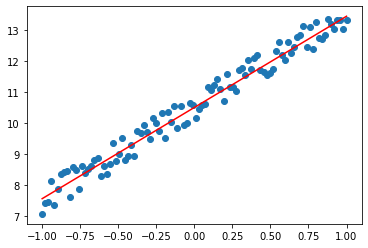

In [10]:
plt.scatter(x.data, y.data)
plt.plot(x, model(x).data, color='red')